In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot,plot, init_notebook_mode
import plotly.offline as py
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
import re
pio.templates.default = 'plotly_dark'
init_notebook_mode(connected=True)

In [2]:
artists_df = pd.read_csv('artists_cleaned.csv')

In [3]:
artists_df.head()

,id,followers,genres,name,popularity
0,7eXSIjGrfSvF1xDDIJwBxC,0.0,NaN,Teddy Stewart Orchestra,16
1,1OsJZxSshQD4BCg1VtwxsN,155.0,classical contralto,Anna Larsson,19
2,5JRTWjFYThNR99D7IOEmn0,106.0,british choir,BBC Chorus,16
3,4sTTEheJxmjwv9TmrHOaPz,288.0,"""childrens story""",Honor Blackman,15
4,3PJ8OSq1gHjL4CIyn1S2bR,265.0,NaN,Andrew Brown,16


In [4]:
top_10artists = artists_df.sort_values('popularity',ascending=False).head(10)
top_10artists

,id,followers,genres,name,popularity
71486,1uNFoZAHBGtllmzznpCI3s,44606973.0,"canadian pop, pop, post-teen pop",Justin Bieber,100
56843,4q3ewBCX7sLwd24euuV69X,32244734.0,"latin, reggaeton, trap latino",Bad Bunny,98
168127,3TVXtAsR1Inumwj472S9r4,54416812.0,"canadian hip hop, canadian pop, hip hop, pop r...",Drake,98
60637,06HL4z0CvFAxyc27GXpf02,38869193.0,"pop, post-teen pop",Taylor Swift,98
56844,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"chicago rap, melodic rap",Juice WRLD,96
71488,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"k-pop, k-pop boy group",BTS,96
71487,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"canadian contemporary r&b, canadian pop, pop",The Weeknd,96
71489,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"pop, post-teen pop",Ariana Grande,95
71490,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"latin, reggaeton, reggaeton colombiano, trap l...",J Balvin,95
56845,7iK8PXO48WeuP03g8YR51W,5001808.0,trap latino,Myke Towers,95


In [153]:
fig = px.bar(top_10artists, x="popularity", y="name", orientation="h", text="popularity", color="name")

fig.update_layout(
    title="Os 10 artistas mais populares",
    xaxis_title="Popularidade",
    yaxis_title="Nome"
)
iplot(fig)

In [6]:
top_10followers = artists_df.sort_values('followers',ascending=False).head(10)

In [7]:
fig = px.bar(top_10followers, x="followers", y="name", orientation="h", text="followers", color="followers", )

fig.update_layout(
    title="Os 10 artistas com mais seguidores",
    xaxis_title="Num. de seguidores",
    yaxis_title="Nome"
)
fig.update_coloraxes(showscale=False)
iplot(fig)

In [8]:
tracks_df = pd.read_csv('tracks_cleaned.csv')

In [29]:
tracks_df.head()

,id,name,popularity,artists,id_artists,release_year,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,41,Bessie Smith,5ESobCkc6JI4tIMxQttqeg,1923,0.614,0.0423,-12.033,1,0.0535,0.996,0.002930,0.183,0.211,89.822,3
1,3eMrYc092k7SIJfWJ7oasR,Weather Bird,38,"Louis Armstrong, Earl Hines","19eLuQmk9aCobbVDHc6eek, 2mY5u4CceAPrpBnse1WpFr",1923,0.831,0.2620,-12.386,1,0.0942,0.984,0.912000,0.204,0.901,104.606,3
2,2AZgaYZSwUosJD71J2N2Zo,'Tain't Nobody's Bizness If I Do,30,Bessie Smith,5ESobCkc6JI4tIMxQttqeg,1923,0.537,0.0443,-16.474,0,0.0343,0.996,0.000265,0.152,0.137,80.468,3
3,7lRFR5GJCxK87ZbVMtQSeS,Ain't Misbehavin',28,Louis Armstrong,19eLuQmk9aCobbVDHc6eek,1923,0.665,0.2540,-9.879,1,0.1080,0.976,0.002170,0.644,0.503,125.734,3
4,6XTvSCqGLLH0vzQQRn55hz,"Empty Bed Blues, Pt. 1",27,Bessie Smith,5ESobCkc6JI4tIMxQttqeg,1923,0.709,0.0620,-12.207,1,0.0480,0.995,0.003410,0.120,0.553,85.854,3


In [9]:
top_10tracks = tracks_df.sort_values('popularity',ascending=False).head(10)

In [10]:
fig = px.bar(top_10tracks, x="popularity", y="name", orientation="h", text="popularity", color="name" )

fig.update_layout(
    title="As 10 músicas mais populares",
    xaxis_title="Popularidade",
    yaxis_title="Nome da música"
)
iplot(fig)

In [13]:
corr_df = tracks_df.corr(method='pearson')

In [20]:
fig = px.imshow(corr_df, text_auto=True, aspect="auto",title='Heatmap de correlações')
iplot(fig)

In [27]:
fig = px.scatter(tracks_df.sample(n=5000), x="energy", y="loudness", color="loudness", trendline="ols", title="Loudness x Energy")
fig.update_coloraxes(showscale=False)
iplot(fig)

In [85]:
fig = px.line( tracks_df.groupby('release_year')['duration_min'].mean().reset_index(), x='release_year',y='duration_min',markers=True,
title='Média de duração das músicas x Ano')
fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Média de duração"
)
iplot(fig)

In [191]:
tracks_df['popularity'].describe()

count    465064.000000
mean         33.997271
std          14.962768
min          10.000000
25%          22.000000
50%          33.000000
75%          44.000000
max         100.000000
Name: popularity, dtype: float64

In [192]:
most_famous = tracks_df[tracks_df['popularity']>44]
less_famous = tracks_df[tracks_df['popularity']<22]

In [209]:
less_famous[['danceability','energy','valence','acousticness','duration_min']].mean().reset_index()

,index,0
0,danceability,0.542719
1,energy,0.502915
2,valence,0.566623
3,acousticness,0.510489
4,duration_min,3.811126


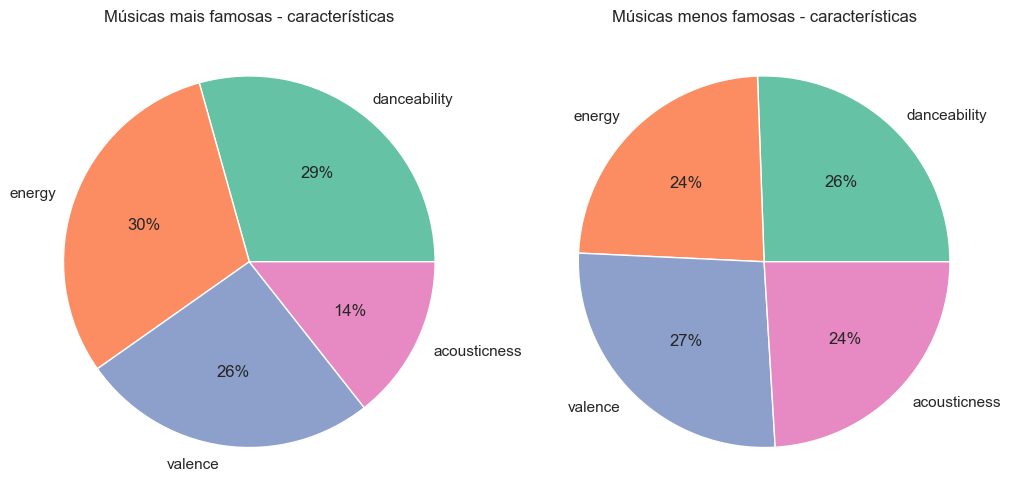

In [207]:
data1 = most_famous[['danceability','energy','valence','acousticness']].mean().reset_index()[0].values
keys1 = most_famous[['danceability','energy','valence','acousticness']].mean().reset_index()['index'].values
data2 = less_famous[['danceability','energy','valence','acousticness']].mean().reset_index()[0].values
keys2 = less_famous[['danceability','energy','valence','acousticness']].mean().reset_index()['index'].values
#palette_color = sns.color_palette('bright')
sns.set_theme(context='notebook',style='ticks', palette='Set2', font='sans-serif', font_scale=1, color_codes=True, rc=None)
fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout=True, figsize=(10,5))
ax1.pie(data1, labels=keys1, autopct='%.0f%%')
ax1.set_title('Músicas mais famosas - características')
ax2.pie(data2, labels=keys2, autopct='%.0f%%')
ax2.set_title('Músicas menos famosas - características')
fig.show()